# THE SPARKS FOUNDATION

# TASK 1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

Author - Devashish Jaiswal

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset=pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
dataset.isnull== True

False

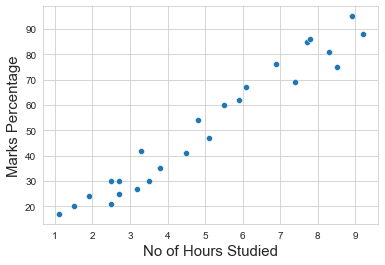

In [21]:
sns.set_style('whitegrid')
sns.scatterplot(y=dataset['Scores'], x=dataset['Hours'])
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('No of Hours Studied', size=15)
plt.show()

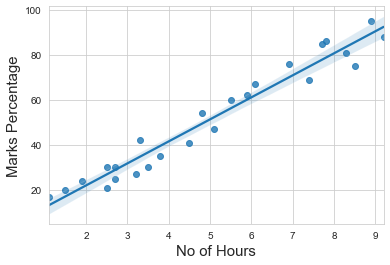

In [22]:
sns.regplot(y=dataset['Scores'], x=dataset['Hours'])
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('No of Hours', size=15)
plt.show()

# Preparing the Data

In [23]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Training the Data

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print("Model Trained")

Model Trained


In [26]:
pred = model.predict(X_test)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [27]:
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing Between Predicted Marks and the Actual Marks

In [28]:
comparision = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': pred})
comparision

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


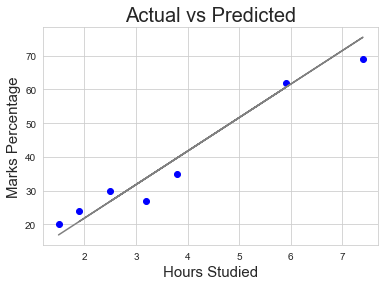

In [29]:
plt.scatter(x=X_test, y=Y_test, color='blue')
plt.plot(X_test, pred, color='grey')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day

In [30]:
Hours=[9.25]
result=model.predict([Hours])
print("Predicted Score = {}".format(round(result[0],3)))

Predicted Score = 93.893


# Evaluating Model

In [31]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(Y_test,pred))

Mean absolute error:  4.130879918502486


According to the prediction done by the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.